# Downloding the data

In [0]:
!wget --header="Host: www.manythings.org" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: http://www.manythings.org/anki/" --header="Cookie: __cfduid=d8e66d33dc7e0734531aca305586b998e1587483534; __utmc=3028652; __utma=3028652.1511764841.1587483538.1587483538.1587538758.2; __utmz=3028652.1587538758.2.2.utmcsr=towardsdatascience.com|utmccn=(referral)|utmcmd=referral|utmcct=/word-level-english-to-marathi-neural-machine-translation-using-seq2seq-encoder-decoder-lstm-model-1a913f2dc4a7; __utmb=3028652.1.10.1587538758" --header="Connection: keep-alive" "http://www.manythings.org/anki/mar-eng.zip" -c -O 'mar-eng.zip'

--2020-04-27 00:28:41--  http://www.manythings.org/anki/mar-eng.zip
Resolving www.manythings.org (www.manythings.org)... 104.24.108.196, 104.24.109.196, 2606:4700:3033::6818:6dc4, ...
Connecting to www.manythings.org (www.manythings.org)|104.24.108.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1242995 (1.2M) [application/zip]
Saving to: ‘mar-eng.zip’

mar-eng.zip         100%[===================>]   1.18M  4.28MB/s    in 0.3s    

2020-04-27 00:28:41 (4.28 MB/s) - ‘mar-eng.zip’ saved [1242995/1242995]



In [0]:
cd drive/My\ Drive/English-Marathi translation

/content/drive/My Drive/English-Marathi translation


# Extracting the data

In [0]:
!unzip mar-eng.zip -d ./

# Importing libraries

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from string import digits
import re
from sklearn.utils import shuffle
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Input, Dense,Embedding
from keras.models import Model,load_model
from keras.utils import plot_model
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import Tokenizer
from keras.models import model_from_json
import pickle as pkl
import numpy as np

# Loading the data

In [0]:
with open('mar.txt','r') as f:
  data = f.read()

# len(data)

5226609

# Cleaning and preprocessing the data

In [0]:
# we need to clean the data
uncleaned_data_list = data.split('\n')

In [0]:
len(uncleaned_data_list)

38697

In [0]:
uncleaned_data_list = uncleaned_data_list[:38695]

In [0]:
len(uncleaned_data_list)

38695

In [0]:
english_word = []
marathi_word = []
cleaned_data_list = []
for word in uncleaned_data_list:
  english_word.append(word.split('\t')[:-1][0])
  marathi_word.append(word.split('\t')[:-1][1])

In [0]:
len(english_word), len(marathi_word)

(38695, 38695)

# Creating the dataframe and saving the data into csv

In [0]:
language_data = pd.DataFrame(columns=['English','Marathi'])
language_data['English'] = english_word
language_data['Marathi'] = marathi_word

In [0]:
# saving to csv
language_data.to_csv('language_data.csv', index=False)

In [0]:
language_data = pd.read_csv('language_data.csv')

In [0]:
language_data.head()

,English,Marathi
0,Go.,जा.
1,Run!,पळ!
2,Run!,धाव!
3,Run!,पळा!
4,Run!,धावा!


In [0]:
language_data.tail()

,English,Marathi
38690,"If religion were synonymous with morality, Bra...","जर धर्म व नीतिमत्ता समानार्थी शब्द असते, तर ब्..."
38691,Just saying you don't like fish because of the...,हड्डींमुळे मासे आवडत नाही असं म्हणणं हे काय मा...
38692,The Japanese Parliament today officially elect...,आज जपानी संसदेने अधिकृतरित्या र्‍यौतारौ हाशिमो...
38693,Tom tried to sell his old VCR instead of throw...,टॉमने त्याचा जुना व्ही.सी.आर फेकून टाकण्याऐवजी...
38694,You can't view Flash content on an iPad. Howev...,आयपॅडवर फ्लॅश आशय बघता येत नाही. पण तुम्ही त्य...


## Data cleaning 

In [0]:
english_text = language_data['English'].values
marathi_text = language_data['Marathi'].values

In [0]:
english_text[0], marathi_text[0]

('Go.', 'जा.')

In [0]:
len(english_text), len(marathi_text)

(38695, 38695)

In [0]:
english_text_ = [x.lower() for x in english_text]
marathi_text_ = [x.lower() for x in marathi_text]

In [0]:
type(english_text_), type(marathi_text_)

(list, list)

## Text Preprocessing

In [0]:
english_text_ = [re.sub("'",'',x) for x in english_text_]
marathi_text_ = [re.sub("'",'',x) for x in marathi_text_]

In [0]:
def remove_punc(text_list):
  table = str.maketrans('', '', string.punctuation)
  removed_punc_text = []
  for sent in text_list:
    sentance = [w.translate(table) for w in sent.split(' ')]
    removed_punc_text.append(' '.join(sentance))
  return removed_punc_text
english_text_ = remove_punc(english_text_)
marathi_text_ = remove_punc(marathi_text_)

In [0]:
# removing the digits from english sentances
remove_digits = str.maketrans('', '', digits)
removed_digits_text = []
for sent in english_text_:
  sentance = [w.translate(remove_digits) for w in sent.split(' ')]
  removed_digits_text.append(' '.join(sentance))
english_text_ = removed_digits_text

# removing the digits from the marathi sentances
marathi_text_ = [re.sub("[२३०८१५७९४६]","",x) for x in marathi_text_]
marathi_text_ = [re.sub("[\u200d]","",x) for x in marathi_text_]

# removing the stating and ending whitespaces
english_text_ = [x.strip() for x in english_text_]
marathi_text_ = [x.strip() for x in marathi_text_]

In [0]:
# removing the starting and ending whitespaces
english_text_ = [x.strip() for x in english_text_]
marathi_text_ = [x.strip() for x in marathi_text_]

In [0]:
# Putting the start and end words in the marathi sentances
marathi_text_ = ["start " + x + " end" for x in marathi_text_]

In [0]:
# manipulated_marathi_text_
marathi_text_[0], english_text_[0]

('start जा end', 'go')

In [0]:
len(marathi_text_),len(english_text)

(38695, 38695)

# Data spliting

In [0]:
X = english_text_
Y = marathi_text_

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1)
len(X_train),len(y_train), len(X_test), len(y_test)

(34825, 34825, 3870, 3870)

In [0]:
X[0], Y[0]

('go', 'start जा end')

In [0]:
X_train[0], y_train[0]

('he doesnt speak our language', 'start तो आमची भाषा बोलत नाही end')

## Data preparing for encoder and decoder

In [0]:
# preparing data for the word embedding
def Max_length(data):
  max_length_ = max([len(x.split(' ')) for x in data])
  return max_length_

#Training data
max_length_english = Max_length(X_train)
max_lenght_marathi = Max_length(y_train)

#Test data
max_length_english_test = Max_length(X_test)
max_lenght_marathi_test = Max_length(y_test)

In [0]:
max_lenght_marathi, max_length_english

(26, 32)

In [0]:

def tokenizer_(text_data):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(text_data)
  return tokenizer

tokenizer_input = tokenizer_(X_train)
vocab_size_input = len(tokenizer_input.word_index) + 1
tokenizer_target = tokenizer_(y_train)
vocab_size_target = len(tokenizer_target.word_index) + 1

In [0]:
with open('tokenizer_input.pkl','wb') as f:
  pkl.dump(tokenizer_input,f)

with open('tokenizer_target.pkl','wb') as f:
  pkl.dump(tokenizer_target,f)
pkl.dump(tokenizer_input, open('tokenizer_input.pkl', 'wb'))
pkl.dump(tokenizer_target, open('tokenizer_target.pkl', 'wb'))

In [0]:
vocab_size_input,vocab_size_target

(5404, 12728)

In [0]:
# encoder_data_input = []
# decoder_data_input = []
# decoder_target_input = []
# for i,(input_text,target_text) in enumerate(zip(X_train,y_train)):
#   # Encoder input sequence
#   # print(input_text)
#   sequence_input = tokenizer_input.texts_to_sequences([input_text])
#   # print(sequence_input)
#   pad_seq_encoder =  pad_sequences(sequence_input, maxlen=max_length_english, padding='post')
#   # print(pad_seq_encoder.shape)
#   encoder_data_input.extend(pad_seq_encoder)# Always extend else it will make it 3 dimensional data

#   #Decoder input sequence
#   # print(target_text)
#   sequence_target = tokenizer_target.texts_to_sequences([target_text])
#   # print(sequence_target)
#   pad_seq_decoder =  pad_sequences(sequence_target, maxlen=max_lenght_marathi, padding='post')
#   decoder_data_input.extend(pad_seq_decoder)# Always extend else it will make it 3 dimensional data

#   #Decoder target sequence
#   # print("orignal target word:",target_text)
#   word = target_text.split(' ')
#   word.pop(0)
#   # print(word)
#   decoder_target_word = ' '.join(word)
#   # print("after pop target word: ", decoder_target_word)
#   # print(decoder_target_word)
#   decoder_target_word_one_hot = one_hot(decoder_target_word,vocab_size_target)
#   # sequence_target_decoder = tokenizer_target.texts_to_sequences([decoder_target_word])
#   # print(sequence_target_decoder)
#   # pad_seq_decoder_target =  pad_sequences(sequence_target_decoder, maxlen=max_lenght_marathi, padding='post')
#   decoder_target_input.append(np.array(decoder_target_word_one_hot))
#   # break

In [0]:
def generator_batch(X= X_train,Y=y_train, batch_size=128):
  while True:
    for j in range(0, len(X), batch_size):
      encoder_data_input = np.zeros((batch_size,max_length_english),dtype='float32') #metrix of batch_size*max_length_english
      decoder_data_input = np.zeros((batch_size,max_lenght_marathi),dtype='float32') #metrix of batch_size*max_length_marathi
      decoder_target_input = np.zeros((batch_size,max_lenght_marathi,vocab_size_target),dtype='float32') # 3d array one hot encoder decoder target data
      for i, (input_text,target_text) in enumerate(zip(X[j:j+batch_size],Y[j:j+batch_size])):
        for t, word in enumerate(input_text.split()):
          encoder_data_input[i,t] = tokenizer_input.word_index[word] # Here we are storing the encoder 
                                                                     #seq in row here padding is done automaticaly as 
                                                                     #we have defined col as max_lenght
        for t, word in enumerate(target_text.split()):
          # if word == 'START_':
          #   word = 'start'
          # elif word == 'END_':
          #   word = 'end'
          decoder_data_input[i,t] = tokenizer_target.word_index[word] # same for the decoder sequence
          if t>0:
            decoder_target_input[i,t-1,tokenizer_target.word_index[word]] = 1 #target is one timestep ahead of decoder input because it does not have 'start tag'
      # print(encoder_data_input.shape())
      yield ([encoder_data_input,decoder_data_input],decoder_target_input)


# Model

In [0]:
latent_dim = 50
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None,),name="encoder_inputs")
emb_layer_encoder = Embedding(vocab_size_input,latent_dim, mask_zero=True)(encoder_inputs)
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(emb_layer_encoder)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,),name="decoder_inputs")
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
emb_layer_decoder = Embedding(vocab_size_target,latent_dim, mask_zero=True)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(emb_layer_decoder, initial_state=encoder_states)
decoder_dense = Dense(vocab_size_target, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

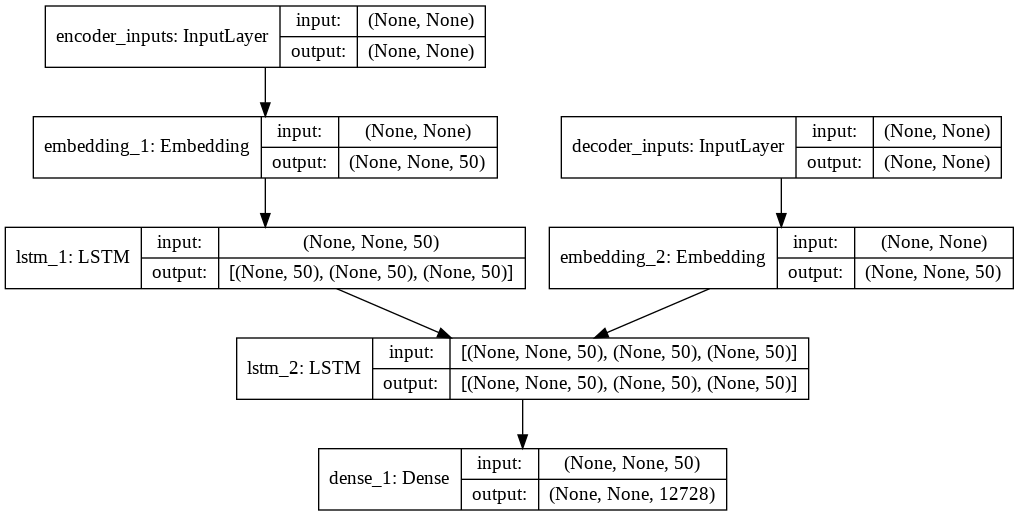

In [0]:
plot_model(model, to_file='train_model.png', show_shapes=True)

In [0]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 50

In [0]:
model.fit_generator(generator = generator_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/50
272/272 [==============================] - 55s 201ms/step - loss: 1.3966 - accuracy: 0.1512
Epoch 2/50
272/272 [==============================] - 52s 191ms/step - loss: 1.2050 - accuracy: 0.1770
Epoch 3/50
272/272 [==============================] - 52s 192ms/step - loss: 1.1438 - accuracy: 0.2005
Epoch 4/50
272/272 [==============================] - 52s 193ms/step - loss: 1.0995 - accuracy: 0.2185
Epoch 5/50
272/272 [==============================] - 52s 192ms/step - loss: 1.0583 - accuracy: 0.2343
Epoch 6/50
272/272 [==============================] - 52s 192ms/step - loss: 1.0210 - accuracy: 0.2506
Epoch 7/50
272/272 [==============================] - 52s 192ms/step - loss: 0.9889 - accuracy: 0.2657
Epoch 8/50
272/272 [==============================] - 52s 191ms/step - loss: 0.9606 - accuracy: 0.2787
Epoch 9/50
272/272 [==============================] - 52s 192ms/step - loss: 0.9340 - accuracy: 0.2915
Epoch 10/50
272/272 [==============================] - 52s 190ms/step - l

## Saving the model into Json

In [0]:
model_json = model.to_json()
with open("model_2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_weight_5.h5")
print("Saved model to disk")

## Loading the model and weight from Json

In [0]:

# loading the model architecture and asigning the weights
json_file = open('model_2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_loaded = model_from_json(loaded_model_json)
# load weights into new model
model_loaded.load_weights("model_weight_5.h5")

# Inference

In [0]:
latent_dim = 50
#inference encoder
encoder_inputs_inf = model_loaded.input[0] #Trained encoder input layer
encoder_outputs_inf, inf_state_h, inf_state_c = model_loaded.layers[4].output # retoring the encoder lstm output and states
encoder_inf_states = [inf_state_h,inf_state_c]
encoder_model = Model(encoder_inputs_inf,encoder_inf_states)

In [0]:
#inference decoder
# The following tensor will store the state of the previous timestep in the "starting the encoder final time step"
decoder_state_h_input = Input(shape=(latent_dim,)) #becase during training we have set the lstm unit to be of 50
decoder_state_c_input = Input(shape=(latent_dim,))
decoder_state_input = [decoder_state_h_input,decoder_state_c_input]

# # inference decoder input
decoder_input_inf = model_loaded.input[1] #Trained decoder input layer
# decoder_input_inf._name='decoder_input'
decoder_emb_inf = model_loaded.layers[3](decoder_input_inf)
decoder_lstm_inf = model_loaded.layers[5]
decoder_output_inf, decoder_state_h_inf, decoder_state_c_inf = decoder_lstm_inf(decoder_emb_inf, initial_state =decoder_state_input)
decoder_state_inf = [decoder_state_h_inf,decoder_state_c_inf]
#inference dense layer
dense_inf = model_loaded.layers[6]
decoder_output_final = dense_inf(decoder_output_inf)# A dense softmax layer to generate prob dist. over the target vocabulary

decoder_model = Model([decoder_input_inf]+decoder_state_input,[decoder_output_final]+decoder_state_inf)



## loading the saved tokenizer for the prediction

In [0]:
with open('tokenizer_input.pkl','rb') as f:
  tokenizer_input = pkl.load(f)
with open('tokenizer_target.pkl','rb') as f:
  tokenizer_target = pkl.load(f)
# Creating the reverse mapping to get the word from the index in the sequence
reverse_word_map_input = dict(map(reversed, tokenizer_input.word_index.items()))
reverse_word_map_target = dict(map(reversed, tokenizer_target.word_index.items()))

## Code for generating the translated sentance

In [0]:
# Code to predct the input sentences translation
def decode_seq(input_seq):
  # print("input_seq=>",input_seq)
  state_values_encoder = encoder_model.predict(input_seq)
  # intialize the target seq with start tag
  target_seq = np.zeros((1,1))
  target_seq[0, 0] = tokenizer_target.word_index['start']
  # print("target_seq:=>",target_seq)
  stop_condition = False
  decoder_sentance = ''
  # print("Beforee the while loop")
  while not stop_condition:
    sample_word , decoder_h,decoder_c= decoder_model.predict([target_seq] + state_values_encoder)
    # print("sample_word: =>",sample_word)
    sample_word_index = np.argmax(sample_word[0,-1,:])
    # print("sample_word_index: ",sample_word_index)
    decoder_word = reverse_word_map_target[sample_word_index]
    decoder_sentance += ' '+ decoder_word
    # print("decoded word:=>",decoder_word)
    # print(len(decoder_sentance))
    # print("len(decoder_sentance) > 70: ",len(decoder_sentance) > 70)
    # print('decoder_word == "end"',decoder_word == 'end')
    # print(decoder_word == 'end' or len(decoder_sentance) > 70)
    # stop condition for the while loop
    if (decoder_word == 'end' or 
        len(decoder_sentance) > 70):
        stop_condition = True
        # print("from if condition")
    # target_seq = np.zeros((1,1))
    target_seq[0, 0] = sample_word_index
    # print(target_seq)
    state_values_encoder = [decoder_h,decoder_c]
  return decoder_sentance


## some sentance translation from english sentance

In [0]:
for i in range(100):
  sentance = X_test[i]
  original_target = y_test[i]
  input_seq = tokenizer_input.texts_to_sequences([sentance])
  pad_sequence = pad_sequences(input_seq, maxlen= 30, padding='post')
  # print('input_sequence =>',input_seq)
  # print("pad_seq=>",pad_sequence)
  predicted_target = decode_seq(pad_sequence)
  print("Test sentance: ",i+1)
  print("sentance: ",sentance)
  print("origianl translate:",original_target[6:-4])
  print("predicted Translate:",predicted_target[:-4])
  print("=="*50)


Test sentance:  1
sentance:  close the window before going to bed
origianl translate: झोपायला जाण्यापूर्वी खिडकी बंद करा
predicted Translate:  खिडकी बंद कर
Test sentance:  2
sentance:  you didnt call me
origianl translate: तुम्ही मला फोन केला नाहीत
predicted Translate:  तू मला फोन केला नाही
Test sentance:  3
sentance:  we saw the airplane
origianl translate: आम्हाला विमान दिसलं
predicted Translate:  आम्हाला टॉमने बघितलं पाहिजे
Test sentance:  4
sentance:  why dont you grow a beard
origianl translate: तू दाढी का नाही वाढवत
predicted Translate:  तू विचार केला का आहे
Test sentance:  5
sentance:  yokohama is a city where more than three million people live
origianl translate: योकोहामा एक असं शहर आहे जिथे तीन दशलक्षापेक्षा जास्त लोकं राहतात
predicted Translate:  तीन लोकं सर्वात मोठ्या शहरात जातो तरी काय आहे
Test sentance:  6
sentance:  its only blood
origianl translate: रक्तच तर आहे
predicted Translate:  फक्त आहे
Test sentance:  7
sentance:  i had more fun this year
origianl translate: मला 